In [2]:
import numpy as np

In [3]:
data = np.load("part1a.npz")

In [4]:
data.files

['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']

In [5]:
data['Svc_0_pmf']

array([[0.10953309, 0.03300776, 0.08179044, 0.11593994],
       [0.03089752, 0.08511994, 0.04528764, 0.05718283],
       [0.07471465, 0.02495643, 0.10236599, 0.04256696],
       [0.01605863, 0.08109608, 0.09158212, 0.00789999]])

In [6]:
data['Lc']

array([0.3, 0.4, 0.7, 1. ])

In [7]:
data['Ic_0']

array([47, 90, 51, 65], dtype=int64)

In [8]:
data['gamma']

array(0.07142857)

In [9]:
data['N']

array(100000.)

In [10]:
from scipy import integrate
from itertools import product
import matplotlib as mpl

In [11]:
I_0=data['Ic_0']
S_0=data['Svc_0_pmf'].flatten()*(data['N']-sum(I_0))
R_0=np.array([0])##initall recovery is zero 
t=np.linspace(0,120,120) #120 days 
N=data['N'].reshape(-1,1)

Betas=np.linspace(0.1,1.0,16).reshape(4,4)
Gamma=data['gamma'].reshape(-1,1)
initial_vec=np.concatenate([S_0,I_0,R_0])
initial_vec[-1]

0.0

# Part 1

In [12]:
#build sir model 
def SIR(t,y,betas,gammas):
    S_vec=y[:16].reshape(4,4)
    I_vec=y[16:20]
    R_vec=y[20]
    N=100000 ##population size 
    
    dsvc_dt=-(betas*S_vec*sum(I_vec)/N)
    dic_dt=-(np.sum(dsvc_dt,axis=0))-(gammas*I_vec)
    dr_dt=gammas*sum(I_vec)
    
    vectors=np.concatenate([dsvc_dt.flatten(),dic_dt.flatten(),dr_dt.flatten()])
    return vectors

In [13]:
from scipy.integrate import solve_ivp

solution=solve_ivp(SIR,(t[0],t[-1]),initial_vec,args=(Betas,Gamma),dense_output=True)
solution.sol(t[-1])

array([2.85431862e+03, 3.84438172e+02, 4.25780502e+02, 2.69782372e+02,
       3.21389907e+01, 3.95828316e+01, 9.41613426e+00, 5.31672541e+00,
       3.10718803e+00, 4.64379607e-01, 8.52709047e-01, 1.58864391e-01,
       2.68862293e-02, 6.10327301e-02, 3.10789567e-02, 1.21458589e-03,
       3.30473022e+01, 1.80822262e+01, 2.47541942e+01, 1.92871275e+01,
       9.58793514e+04])

In [14]:
solutions=[solution.sol(time) for time in t]
S_vc=np.array([np.sum(sol[:16]) for sol in solutions]) 
I_c=np.array([np.sum(sol[16:20]) for sol in solutions])
R=np.array([np.sum(sol[20]) for sol in solutions])


In [15]:
import matplotlib.pyplot as plt


# Part 1.3 free response 

    In our S_vc pmf plots theyre all having the same curve but some converge to a constant number while otyher S_vc pmf can be seen to converge to zero. The reason for this could be that the infection rate didnt effect the suspectiable enough for it to reach a level zero as other pmf it affect them drastiaclly thus seeing them converge to zero or a really close number to zero. 

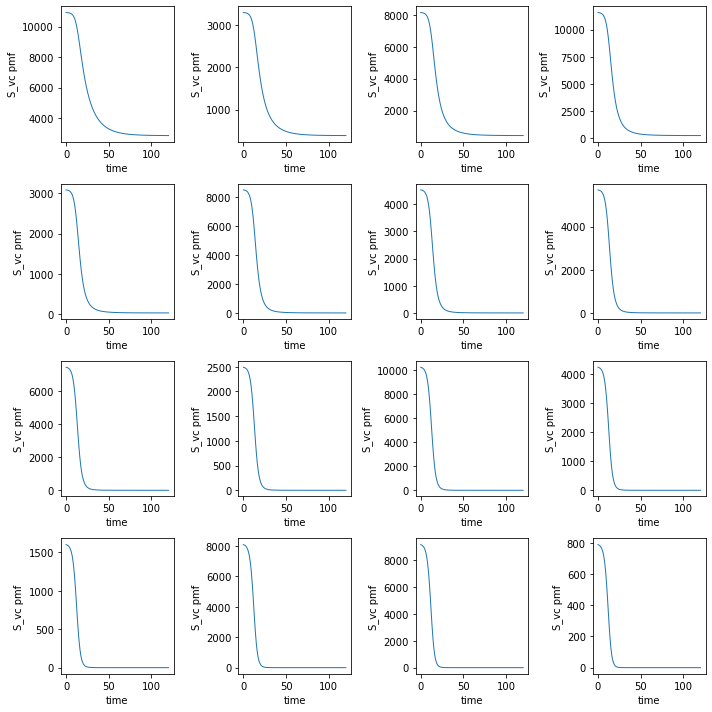

In [16]:
#S_vc
plt.figure(figsize=(10,10))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    
    plt.plot(t,solution.sol(t)[i],linewidth=1)# relation to its pmf 
    plt.xlabel("time")
    plt.ylabel("S_vc pmf")
plt.tight_layout()    
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

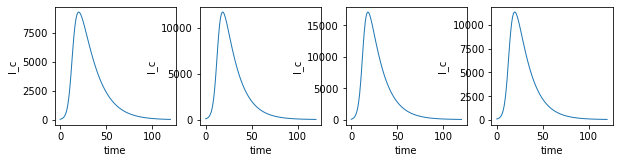

In [17]:
#I_c
plt.figure(figsize=(10,10))

for i in range(0,4):
    plt.subplot(4,4,i+1)
    
    plt.plot(t,solution.sol(t)[i+16],linewidth=1)# relation to its pmf 
    plt.xlabel("time")
    plt.ylabel("I_c")
  
plt.show

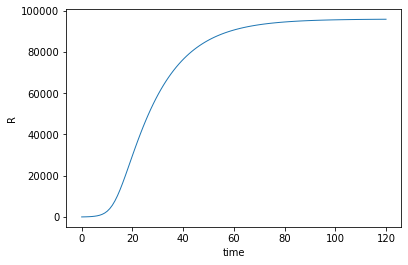

In [18]:
#R

plt.plot(t,solution.sol(t)[-1],linewidth=1) 
plt.xlabel("time")
plt.ylabel("R")

plt.show()

# Part 1.3 Free response 

    In our SIR model graph we can depict three different plots. The red plot decribes the suspectiable and the blue describe the Infected and the green describes the recovered.

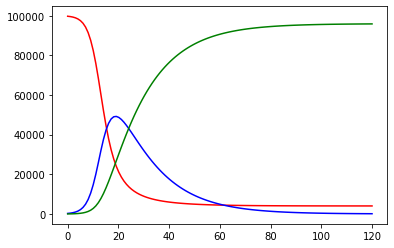

In [19]:
fig, ax = plt.subplots(1)

#ax[0].plot(t,S_vc)
#ax[1].plot(t,I_c)
#ax[2].plot(t,R)

plt.plot(t, S_vc, 'r') # red 
plt.plot(t, I_c, 'b') # blue
plt.plot(t, R, 'g') # green

plt.show()

In [52]:
def total_viralL():
    #fig, ax = plt.subplots(1)
    sum=0
    total_L=0
    L_c=data['Lc']
    
    
    for x in (I_c):
        sum+=x
        #print(sum)
    total_L=sum*L_c

    return total_L
    #plt.plot(t, total_L, 'r') # red 
    #plt.show()
    '''for item in total_L:
        plt.plot(t[1,4], item, 'g') was trying to iterate through the array of L points but says it's not iterable
        plt.show()
    '''
    ##plt.plot(t,total_L) tried plotting this was too but didn't work
    ##plt.show()
    
d=total_viralL()
print(d)

[ 399389.21563357  532518.95417809  931908.16981166 1331297.38544522]


<function matplotlib.pyplot.show(*args, **kw)>

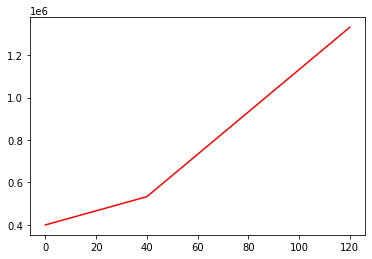

In [53]:
nt=np.linspace(0,120,4)
plt.plot(nt,d,'r')
plt.show

# Part1.6

In [57]:
Betas1=Betas*1/4
solution1=solve_ivp(SIR,(t[0],t[-1]),initial_vec,args=(Betas1,Gamma),dense_output=True)

In [58]:
solutions1=[solution1.sol(time) for time in t]
S_vc1=np.array([np.sum(sol[:16]) for sol in solutions1]) 
I_c1=np.array([np.sum(sol[16:20]) for sol in solutions1])
R1=np.array([np.sum(sol[20]) for sol in solutions1])

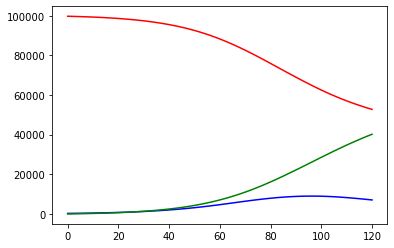

In [60]:
fig, ax = plt.subplots(1)

plt.plot(t, S_vc1, 'r') # red 
plt.plot(t, I_c1, 'b') # blue
plt.plot(t, R1, 'g') # green

plt.show()

# Response to graph above ^
    We can that our SIR model plot graph didnt converge or "flatten" once we changed our betas values by 1/4. The infected plot was never higher than the recovered plot so we assume that the recovery rate was faster than the infection rate which also explain why suspectiable never reached to be convered to zero like our last SIR model plot graph.